# DRACO - Milestone 2: Dataset exploration

This document is structured as follow:

1. Characters Data - Extraction and Processing
2. Movie Data - Extraction and Processing
3. Actors Ethinicites - Exploration

---

In [62]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
import seaborn as sns
%matplotlib inline
from scipy import stats

In [63]:
DATA_FOLDER = './Data'

MOVIES_SUMMARIES_FOLDER = DATA_FOLDER + '/MovieSummaries'
CHARACTER_PATH = MOVIES_SUMMARIES_FOLDER + '/character.metadata.tsv'
MOVIE_PATH = MOVIES_SUMMARIES_FOLDER + '/movie.metadata.tsv'
NAME_PATH = MOVIES_SUMMARIES_FOLDER + 'name.clusters.txt'
PLOT_PATH = MOVIES_SUMMARIES_FOLDER + 'plot_summaries.txt'


ETHNICITY_PATH = DATA_FOLDER + '/ethnicities_data.tsv'
ETHNICITY_GROUP_PATH = DATA_FOLDER + '/ethnicity_group_data.tsv'

KAGGLE_PATH = DATA_FOLDER + '/Kaggle'
MOVIES_KAGGLE_PATH = KAGGLE_PATH + '/movies_metadata.csv'
RATING_PATH = KAGGLE_PATH + '/ratings.csv'


## Importation of each datasets

### **CMU Movie corpus dataset**

### Character data

In [64]:
characters_original = pd.read_csv(CHARACTER_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name", "Birth", 
    "Gender", "Height", "Ethnicity ID", "Name", "Age at movie release",
    "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])

### CMU Movie data

In [65]:
movies_CMU = pd.read_csv(MOVIE_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name","Movie release date", "Box office revenue","Movie runtime","Movie language","Movie countries","Movie genres" ])

###  **External dataset**

### Ethnicity data

These data were created using the files `Ethnicity_extraction.iypnb` and `Ethnicity_grouped.iypnb`

In [66]:
ethnicities_original = pd.read_csv(ETHNICITY_PATH, sep='\t',  
                               header=0, names=["Ethnicity ID", "Ethnicity"])

ethnic_group_original = pd.read_csv(ETHNICITY_GROUP_PATH, sep='\t')

### Kaggle dataset

To expand our dataset with additional information, we decided to include the full MovieLens Dataset found on [Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data). This dataset contain the following files
- **movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

- **keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- **credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

- **links.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

- **links_small.csv:** Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

- **ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies.

In [67]:
movies_kaggle = pd.read_csv(MOVIES_KAGGLE_PATH, header = 0,
    names = ["Adult", "Belongs to collection", "Budget", "Genres", "Homepage", 
    "Kaggle_ID", "IMBD_ID", "Language", "Orignal title", "Plot summary",
    "Popularity", "Poster path", "Production companies","Production countries",
    "Movie release date","Box office revenue","Movie runtime","Spoken language","status",
    "Tagline", "Movie name", "Video", "Vote average", "Vote count"])

C:\Users\diana\AppData\Local\Temp\ipykernel_2016\2743342987.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_kaggle = pd.read_csv(MOVIES_KAGGLE_PATH, header = 0,


## Preprocessing of the Data

### Cleaning the data

#### Character data

Let's see what the movie dataset looks like.

In [68]:
characters_original.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [69]:
characters_original.describe()

,Wikipedia Movie ID,Height,Age at movie release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


As we can see there are issues in the dataset. 
- First some ethnicites as well as gender are not specified.
- Second we can see that the age at movie release spans from -7896 to 103 years.

For our analysis we have decided to discard all characters that don't have a specified ethnicity as well as a specified gender. Moreover, only strictly positive ages will be taken into account. Also, since we are not interested in the height and name of the actor that the column `Freebase Movie ID` is redundant with `Wikipedia Movie ID`, we have decided to drop those columns. 

In [70]:
characters = characters_original.copy()
characters = characters.drop(['Freebase Movie ID','Height','Name'], axis=1)

In [71]:
characters = characters[characters['Ethnicity ID'].notna()]
characters = characters[characters['Gender'].notna()]
characters = characters[characters['Age at movie release'] > 0]

In [72]:
characters.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
1,975900,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,/m/044038p,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
11,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb
27,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp


#### Movie data

##### **CMU dataset**

Let's see what the CMU movie dataset looks like.

In [73]:
movies_CMU.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


All columns of this dataset are relevant for the following justifications:
- Wikipedia Movie ID: used to get website request
- Freebase Movie ID: used to merge the plot summaries to the MCU movie dataset
- Movie name: used to merge other external movie dataset with MCU movie dataset
- Box office revenue: Useful for the data analysis.

**Need to be finished**

Then let's do few first step of pre-processing related to the dataset (the remaining pre-processing will be done later after merging the datasets). We first need to correct the format of columns which countains dictionaries, e.g `Movie language`, `Movie countries` and `Movie genres`. In our case, it would be much more convenient to have lists instead. Let's process it accordingly.

In [74]:
movies_CMU["Movie countries"] = movies_CMU["Movie countries"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies_CMU["Movie genres"] = movies_CMU["Movie genres"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies_CMU["Movie language"] = movies_CMU["Movie language"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')

As the dataset was released in 2013, the data from that year is not complete and thus should be removed. To simplify this step we can add a category for the year of release in addition of the date of release.

In [75]:
#Errors = 'coerce' will force the values that are outside the bound to be NaT
movies_CMU["Movie release year"] = pd.to_datetime(movies_CMU["Movie release date"],format='mixed',errors = 'coerce').dt.year
#Remove the NaN and NaT values
movies_CMU = movies_CMU[movies_CMU["Movie release year"].notna()]
#Express all years of realese as int.
movies_CMU["Movie release year"] = movies_CMU["Movie release year"].astype("int")

#Finaly let's remove the movies released in 2013
movies_CMU = movies_CMU[movies_CMU['Movie release year'] < 2013]


We want to verify that no movies are duplicated, and if they are we want to keep the ones that have the correct information. We show here the movie titles that appear multiple times. The example of Indiana Jones and the Last Crusade is shown here, the choice of the kept movies is done manually.

In [76]:
columns_to_compare = ['Movie name', 'Movie release date']
movie_duplicates = movies_CMU.duplicated(subset=columns_to_compare, keep=False)
equal_rows_df = movies_CMU[movie_duplicates]
names=equal_rows_df['Movie name'].unique()
print(names)
display(equal_rows_df[equal_rows_df['Movie name']== 'Indiana Jones and the Last Crusade'])

['Landspeed: CKY' 'Apocalypse' 'Buck Rogers in the 25th Century'
 'Indiana Jones and the Last Crusade' 'Fist of the North Star'
 'The Other Side' 'Three Sisters' 'Secrets of Nature' 'Treasure Island'
 'Little Big Horn' 'Jeepers Creepers' 'The Living and the Dead'
 'Invincible' 'Moscow Strikes Back' 'Gossip' 'The Ambassador' 'Camille'
 'Orange' 'Milan' 'Armour of God II: Operation Condor' 'Going Back'
 'Brahmachari' 'The Job' 'Endgame' 'Facing the Music' 'Outpost' 'Exodus'
 'Fragile' 'Yours, Mine and Ours' 'Oliver Twist' 'Durango' 'Sangam' 'A'
 'The Duke' 'Intermezzo' 'Perpetual Wake']


,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
4856,3184269,/m/0dnqr,Indiana Jones and the Last Crusade,1989-05-24,NaN,127.0,"[Greek Language, German Language, English Lang...",[United States of America],"[Costume Adventure, Action, Adventure Comedy, ...",1989
49203,51888,/m/0h_b6x1,Indiana Jones and the Last Crusade,1989-05-24,474171806.0,127.0,NaN,NaN,[Adventure],1989


When the movie metadata is very similar, we also check the character metadata to differentiate. If none of the possibilities have characters, we can drop all of them. This is the case of the two occurences of Landspeed: CKY, for example. Of course, if the possibilities shown are indeed different, we keep all of them.

In [77]:

display(characters[characters['Wikipedia Movie ID']==3184269])
display(characters[characters['Wikipedia Movie ID']==51888])


,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
2419,3184269,1989-05-24,Indiana Jones,1942-07-13,M,/m/01qhm_,46.0,/m/0jzx7x,/m/03ttl,/m/0c0k1
2420,3184269,1989-05-24,"Henry Jones, Sr.",1930-08-25,M,/m/03lmx1,58.0,/m/0jzx81,/m/0bss74,/m/06mr6
2421,3184269,1989-05-24,Sallah,1944-05-05,M,/m/06gbnc,45.0,/m/0jzx86,/m/0g2byj,/m/01846t
2425,3184269,1989-05-24,General Vogel,1943-11-07,M,/m/02w7gg,45.0,/m/03jqxj0,/m/0h5sxnp,/m/0c6mv6
2426,3184269,1989-05-24,Gestapo,1937-05-19,M,/m/0g96wd,52.0,/m/03mk_ty,/m/0hgyvv2,/m/036m4c
2427,3184269,1989-05-24,Indiana Jones,1970-08-23,M,/m/041rx,18.0,/m/0448qqk,/m/03ttl,/m/015076
2431,3184269,1989-05-24,Sultan,1952-08-07,M,/m/041rx,36.0,/m/0h2qcg5,/m/0h2qcg8,/m/01nxwv


,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
260297,51888,1989-05-24,NaN,1970-08-23,M,/m/041rx,18.0,/m/0k3fynx,NaN,/m/015076
260298,51888,1989-05-24,NaN,1944-05-05,M,/m/06gbnc,45.0,/m/0k3fmhl,NaN,/m/01846t
260301,51888,1989-05-24,NaN,1930-08-25,M,/m/03lmx1,58.0,/m/0k3g4_p,NaN,/m/06mr6
260302,51888,1989-05-24,NaN,1942-07-13,M,/m/01qhm_,46.0,/m/0k3g5x9,NaN,/m/0c0k1


We notice that the second ID doesn't give correct information, this is the one that we will let go of. However, it also contains information that is missing from the first ID. We verify the veracity of the information and transfer it to the other row if correct, in our case this only happens once.

In [78]:
movies_CMU[movies_CMU['Wikipedia Movie ID'].isin([51888,3184269])]=movies_CMU[movies_CMU['Wikipedia Movie ID'].isin([51888,3184269])].fillna(method='backfill')

In [79]:

#we make a list of the movie IDs to drop
ids_to_drop=[51888,8721073,30755379,22609983,35075250,20774714, 24904539,32276034,14592879,33041728,34014517,11805916,9562585,28683974,6678894,5710355,6674887,18519065,1407235,
             31214305,9141521,20306762,30367860,15391331]
movies_CMU=movies_CMU[~movies_CMU['Wikipedia Movie ID'].isin(ids_to_drop)]
display(movies_CMU)


,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992


#### **Kaggle dataset**

As explained before, to expand our dataset with more information, we are going to use the Kaggle dataset. Let's then see what can of informations could be relevant for our project.

In [80]:
movies_kaggle.head()

,Adult,Belongs to collection,Budget,Genres,Homepage,Kaggle_ID,IMBD_ID,Language,Orignal title,Plot summary,...,Movie release date,Box office revenue,Movie runtime,Spoken language,status,Tagline,Movie name,Video,Vote average,Vote count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Among these different columns, the informations relevant to analyze the success depending on the cast ethnociyt of a movie are : `Budget`,`Plot summary`, `Movie release date`, `Box office revenue`, `Movie runtime`, `Movie name`, `Vote average` and `Vote count`.
Thus let's drop of the other unnecessary columns.

In [81]:
movies_kaggle = movies_kaggle.drop(["Adult", "Belongs to collection",  "Genres", "Homepage", 
                                    "Kaggle_ID", "IMBD_ID", "Language", "Orignal title", 
                                    "Popularity", "Poster path", "Production companies","Production countries",
                                    "Spoken language","status", "Tagline", "Video"],axis=1)

As for the CMU, let's also change the movie release date format by adding the year of release instead.

In [82]:
#Errors = 'coerce' will force the values that are outside the bound to be NaT
movies_kaggle["Movie release year"] = pd.to_datetime(movies_kaggle["Movie release date"],format='mixed',errors = 'coerce').dt.year

#Remove the NaN and NaT values
movies_kaggle= movies_kaggle.dropna(subset=["Movie release year"])

#Express all years of realese as int.
movies_kaggle["Movie release year"] = movies_kaggle["Movie release year"].astype("int")


In [83]:
movies_kaggle.head()

,Budget,Plot summary,Movie release date,Box office revenue,Movie runtime,Movie name,Vote average,Vote count,Movie release year
0,30000000,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995
1,65000000,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995
2,0,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995
3,16000000,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995
4,0,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995


#### **Merging the dataset**

For better efficiency, we're going to merge the 2 datasets together and clean them after this step.
Before merging let's have a general idea of the size of each datasets and the number of values that can be used directly (not Nan values). This is important to know how much data we could lose if we decided to keep informations present in only one dataset.

In [84]:
#Print the datasets size
print("Length of the MCU dataset : " ,movies_CMU.shape[0])
print("Length of the Kaggle dataset : " ,movies_kaggle.shape[0])

Length of the MCU dataset :  74626
Length of the Kaggle dataset :  45376


In [85]:
#Print the sum of not Nan values 
print(f"Sum of not Nan values in the MCU dataset:\n-------\n{movies_CMU.notna().sum()}")
print(f"===============================")
print(f"Sum of not Nan values in the Kaggle dataset :\n-------\n{movies_kaggle.notna().sum()}")

Sum of not Nan values in the MCU dataset:
-------
Wikipedia Movie ID    74626
Freebase Movie ID     74626
Movie name            74626
Movie release date    74626
Box office revenue     8327
Movie runtime         58591
Movie language        74626
Movie countries       74626
Movie genres          74626
Movie release year    74626
dtype: int64
Sum of not Nan values in the Kaggle dataset :
-------
Budget                45376
Plot summary          44435
Movie release date    45376
Box office revenue    45376
Movie runtime         45130
Movie name            45376
Vote average          45376
Vote count            45376
Movie release year    45376
dtype: int64


Even though the MCU dataset has higher number of missing values, it also has the higher number of values. Therefore it should be used for merging using the left join. However the left join should be only done on the `Movie name` and `Movie release date` to let the possibility of using the values from the Kaggle dataset to complete the `Nan` values of the CMU dataset. We choose the 2 columns to ensure of the identity of the movie, as we can have multiple movies with the same name.
Concerning the general smaller size of the Kaggle dataset, we should also keep in mind that if we want to analyze the vote scores of the merged dataset, we're going to loss half or more of the MCU dataset. But a deeper feasibility analysis will be perform after the data cleaning.

In [86]:
#Let's merge the data
movies = movies_CMU.copy().merge(movies_kaggle,on=['Movie name','Movie release date'],how='left')
#Vizualise the new mereged dataset
movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Box office revenue_x,Movie runtime_x,Movie language,Movie countries,Movie genres,Movie release year_x,Budget,Plot summary,Box office revenue_y,Movie runtime_y,Vote average,Vote count,Movie release year_y
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,28000000,Melanie Ballard (Natasha Henstridge) is a hard...,14010832.0,98.0,4.8,299.0,2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On the merged dataset, we have 2 columns for the `Box office revenue` and the `Movie runtime`. As the Kaggle dataset contains more information concerning the box office than the MCU dataset, we should used its information to complete the missing values of the MCU one. Same thing for the `Movie runtime`. <br>
Plus we should also only keep the year of release.

In [87]:
#Let's replace the Nan values of the MCU dataset by the one of the Kaggel dataset
movies['Box office revenue'] = movies['Box office revenue_x'].fillna(movies['Box office revenue_y'])
movies['Movie runtime'] = movies['Movie runtime_x'].fillna(movies['Movie runtime_y'])
movies['Movie release year']=movies['Movie release year_x'].fillna(movies['Movie release year_y'])

#Let's drop the Box office revenue, movie runtime and also the date of release
movies = movies.drop(['Box office revenue_x','Box office revenue_y','Movie runtime_x','Movie runtime_y', 'Movie release year_x', 'Movie release year_y'],axis=1)

After this, let's see how changed the sum of available data on the merged dataset.

In [88]:
#Print the sum of not Nan values 
print(f"Sum of not Nan values in the CMU dataset:\n-------\n{movies_CMU.notna().sum()}")
print(f"===================================")
print(f"Sum of not Nan values of the merged dataset:\n-------\n{movies.notna().sum()}")

Sum of not Nan values in the CMU dataset:
-------
Wikipedia Movie ID    74626
Freebase Movie ID     74626
Movie name            74626
Movie release date    74626
Box office revenue     8327
Movie runtime         58591
Movie language        74626
Movie countries       74626
Movie genres          74626
Movie release year    74626
dtype: int64
Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID    74636
Freebase Movie ID     74636
Movie name            74636
Movie release date    74636
Movie language        74636
Movie countries       74636
Movie genres          74636
Budget                 8432
Plot summary           8404
Vote average           8432
Vote count             8432
Box office revenue    13486
Movie runtime         58798
Movie release year    74636
dtype: int64


Thanks to the Kaggle dataset we went from 8401 values for the budget to 13572.

In [89]:
movies.drop_duplicates(subset=['Movie name', 'Movie release date'])

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie language,Movie countries,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,95.0,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,NaN,NaN,NaN,NaN,83.0,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",NaN,NaN,NaN,NaN,NaN,110.0,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,[German Language],[Germany],[Drama],NaN,NaN,NaN,NaN,NaN,106.0,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74631,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,[English Language],[United States of America],[Drama],NaN,NaN,NaN,NaN,NaN,120.0,2011
74632,34980460,/m/0g4pl34,Knuckle,2011-01-21,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",NaN,NaN,NaN,NaN,NaN,96.0,2011
74633,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,[English Language],[United States of America],"[Satire, Comedy]",NaN,NaN,NaN,NaN,NaN,66.0,1972
74634,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",NaN,NaN,NaN,NaN,NaN,150.0,1992


To always have the maximal number of available values, we're going to remove the `Nan` values only when the analysis we want to perfom need it. 
However to perform an analysis which is relevant to our subject, there are some pre-processing process to do. We want to focus on movies that could potentially be found on TV or cinema and where real actors are playing in. <br> It means that we should keep movies of duration greater than 10min but smaller than smaller than 4 hours (240min). <br>


In [90]:
#Let's remove the movies of the wrong direction
movies = movies[movies['Movie runtime'] >= 10]
movies = movies[movies['Movie runtime'] < 240]

Plus we should also pay attention to the movie of the Animation field as the actors that have played inside are rather voice actors than actors. 

In [91]:
# First let's see all the unique genres, to discard the animation ones:
unique_genres = set()
movies['Movie genres'].apply(lambda x: unique_genres.update(x))
print(unique_genres)

{'Educational', 'Juvenile Delinquency Film', 'Epic', 'Experimental film', 'Historical Documentaries', 'Filipino Movies', 'Roadshow/Carny', 'Christian film', 'Legal drama', 'Ealing Comedies', 'Media Satire', 'Chick flick', 'Stand-up comedy', 'C-Movie', 'Graphic & Applied Arts', 'Revisionist Western', 'Family Film', 'Science fiction Western', 'Illnesses & Disabilities', 'Stop motion', 'Wuxia', 'Comedy Thriller', 'Detective', 'Cold War', 'Concert film', 'New Queer Cinema', 'Crime Fiction', 'Film adaptation', 'Bollywood', 'Action Comedy', "Children's", 'Buddy cop', 'Romantic drama', 'Marriage Drama', 'Sponsored film', 'Adult', 'Comdedy', 'Heavenly Comedy', 'Western', 'Northern', 'Slasher', 'Psychological horror', 'Comedy of Errors', 'Superhero movie', 'Erotic thriller', 'Gay Themed', 'Family-Oriented Adventure', 'World cinema', 'Goat gland', 'Interpersonal Relationships', 'Short Film', 'Travel', 'Gay Interest', 'Future noir', 'Tragicomedy', 'Time travel', 'Vampire movies', 'Glamorized Spy 

In [92]:
values_to_find = ['Anime', 'Animation', 'Computer Animation', 'Clay animation', 'Animated cartoon','Stop motion']
movies = movies[movies['Movie genres'].apply(lambda x: not(any(value in x for value in values_to_find)))]

Let' see how is movies dataset after pre-processing it.

In [93]:
movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie language,Movie countries,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,95.0,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,NaN,NaN,NaN,NaN,83.0,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",NaN,NaN,NaN,NaN,NaN,110.0,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,[German Language],[Germany],[Drama],NaN,NaN,NaN,NaN,NaN,106.0,1983


In [94]:
print(f"Sum of not Nan values of the merged dataset:\n-------\n{movies.notna().sum()}")

Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID    55584
Freebase Movie ID     55584
Movie name            55584
Movie release date    55584
Movie language        55584
Movie countries       55584
Movie genres          55584
Budget                 8046
Plot summary           8020
Vote average           8046
Vote count             8046
Box office revenue    12792
Movie runtime         55584
Movie release year    55584
dtype: int64


Apart maybe the box office revenue all the other categories seems to be sufficiant.

#### Ethnicity data

Let's see what the ethnicity dataset looks like.

In [95]:
ethnicities_original.head()

,Ethnicity ID,Ethnicity
0,/m/044038p,NaN
1,/m/0x67,African Americans
2,/m/064b9n,Omaha people
3,/m/041rx,Jewish people
4,/m/033tf_,Irish Americans


Here again we have NaN values for some ethnicities, we can drop them now.

In [96]:
ethnicities = ethnicities_original.copy()
ethnicities = ethnicities[ethnicities['Ethnicity'].notna()]

In [97]:
ethnicities.head()

,Ethnicity ID,Ethnicity
1,/m/0x67,African Americans
2,/m/064b9n,Omaha people
3,/m/041rx,Jewish people
4,/m/033tf_,Irish Americans
5,/m/04gfy7,Indian Americans


#### Grouping ethnicities in ethnic groups 

In [98]:
nb_ethnicities = len(np.unique(ethnicities['Ethnicity']))
print('Number of ethncities:',nb_ethnicities)

Number of ethncities: 431


As we can see we have a lot of different ethnicities in the dataframe. For our analysis it could be interresting to group them according to [UK's list of ethnic groups ](https://www.ethnicity-facts-figures.service.gov.uk/style-guide/ethnic-groups). This list groups ethnicity in five main groups:
- White
- Black, Caribbean or African
- Asian
- Mixed or multiple ethnic groups
- Other ethnic group

Nevertheless to have clusters of similar size, we have decided to combine `Asian` with `Other ethnic group` to a larger group called `Asian, Middle East and Tribes`. Thus, the four resulting groups are:
- White
- Black, Caribbean or African
- Asian, Middle East and Tribes
- Mixed or multiple ethnic groups

In [99]:
ethnic_group = ethnic_group_original.copy()
ethnic_group.head()

,Ethnicity,Ethnic Group
0,Aceh,"Asian, Middle East and Tribes"
1,Afghans in India,"Asian, Middle East and Tribes"
2,Agrawal,"Asian, Middle East and Tribes"
3,Asian people,"Asian, Middle East and Tribes"
4,Bengali Brahmins,"Asian, Middle East and Tribes"


### Merging datafames

Now that all the datasets are cleaned, we can merge them in one big dataframe.

Let's first merge the character dataset with the list of ethnicities, so we can add their ethinicity to the dataset

In [100]:
characters_extended = characters.copy().merge(ethnicities, how='inner', on='Ethnicity ID')
characters_extended.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans
2,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans
3,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans
4,156558,2001-06-27,Jody,1978-12-30,M,/m/0x67,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans


Let's merge the characters with the list of ethnic groups to obtain add the ethnic group of each actor

In [101]:
characters_extended = characters_extended.merge(ethnic_group, how='inner', on='Ethnicity')
characters_extended.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity,Ethnic Group
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans,"Black, Caribbean or African"
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans,"Black, Caribbean or African"
2,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans,"Black, Caribbean or African"
3,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans,"Black, Caribbean or African"
4,156558,2001-06-27,Jody,1978-12-30,M,/m/0x67,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans,"Black, Caribbean or African"


Then let's merge the character dataset with the movie dataset to link the actors with the movies they have played


In [102]:
characters_movies = characters_extended.copy().merge(movies, how='inner', on=['Wikipedia Movie ID','Movie release date'])
characters_movies.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie language,Movie countries,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
3,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,...,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,95.0,2000
4,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,...,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",16000000,"The story of Jody, a misguided, 20-year-old Af...",7.3,57.0,29381649.0,123.0,2001


### Showing the feasability of the project 

In this section, we are only interested in the number of different films, actors and characters we have in the processed dataframe. This is to determine whether or not the dataframe contains enough data to be analyzed.

In [103]:
print(f"Sum of not Nan values of the merged dataset:\n-------\n{characters_movies.notna().sum()}")

Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID                 74827
Movie release date                 74827
Character name                     47083
Birth                              74827
Gender                             74827
Ethnicity ID                       74827
Age at movie release               74827
Freebase character/actor map ID    74827
Freebase character ID              47083
Freebase actor ID                  74827
Ethnicity                          74827
Ethnic Group                       74827
Freebase Movie ID                  74827
Movie name                         74827
Movie language                     74827
Movie countries                    74827
Movie genres                       74827
Budget                             20288
Plot summary                       20272
Vote average                       20288
Vote count                         20288
Box office revenue                 35952
Movie runtime                      74827
Movi

##### On the actor side 

In [104]:
nb_actors = len(np.unique(characters_movies['Freebase actor ID']))
print("Number of actors:",nb_actors)
nb_characters = np.shape(characters_movies)[0]
print("Number of characters:",nb_characters)
#Print the number of actors on each of the categories

print(f"\nDistribution of actors' ethnic group in the dataset (without duplicate actors):\n---------\n{characters_movies.drop_duplicates(subset='Freebase actor ID')['Ethnic Group'].value_counts()}")
print(f"\n===================================\n")
print(f"Distribution of actors' ethnic group in the dataset (with duplicate actors):\n---------\n{characters_movies['Ethnic Group'].value_counts()}")

Number of actors: 6756
Number of characters: 74827

Distribution of actors' ethnic group in the dataset (without duplicate actors):
---------
Ethnic Group
White                              2547
Asian, Middle East and Tribes      1914
Black, Caribbean or African        1347
Mixed or multiple ethnic groups     948
Name: count, dtype: int64


Distribution of actors' ethnic group in the dataset (with duplicate actors):
---------
Ethnic Group
White                              29368
Asian, Middle East and Tribes      24131
Mixed or multiple ethnic groups    12366
Black, Caribbean or African         8962
Name: count, dtype: int64


We can see that even if we consider the actors as unique individuals, we are still left with a reasonable amount of data. 
Conversely, if we simply accept the fact that actors played in multiple years, we are left with substantial amounts of data.
Thus, an analysis based on actor ethnicity seems feasible.

##### On the movie side 

In [105]:
unique_movies_id = np.unique(characters_movies['Wikipedia Movie ID'])
print(f"Number of movies:{len(unique_movies_id)}\n")
print(f"Sum of not Nan values of the merged dataset:\n-------\n{characters_movies[characters_movies['Wikipedia Movie ID'].isin(unique_movies_id)].notna().sum()}")




Number of movies:26196

Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID                 74827
Movie release date                 74827
Character name                     47083
Birth                              74827
Gender                             74827
Ethnicity ID                       74827
Age at movie release               74827
Freebase character/actor map ID    74827
Freebase character ID              47083
Freebase actor ID                  74827
Ethnicity                          74827
Ethnic Group                       74827
Freebase Movie ID                  74827
Movie name                         74827
Movie language                     74827
Movie countries                    74827
Movie genres                       74827
Budget                             20288
Plot summary                       20272
Vote average                       20288
Vote count                         20288
Box office revenue                 35952
Movie runtime        

## Data Exploration

### Ethnicity Distribution

Let's create a histogram to better see the Ethnicity Distribution. We will analyze two cases:
- By removing the Duplicates, i.e. count unique actors.
- By keeping the Duplicates, i.e. count actors that appeared multiple times in different movies. 

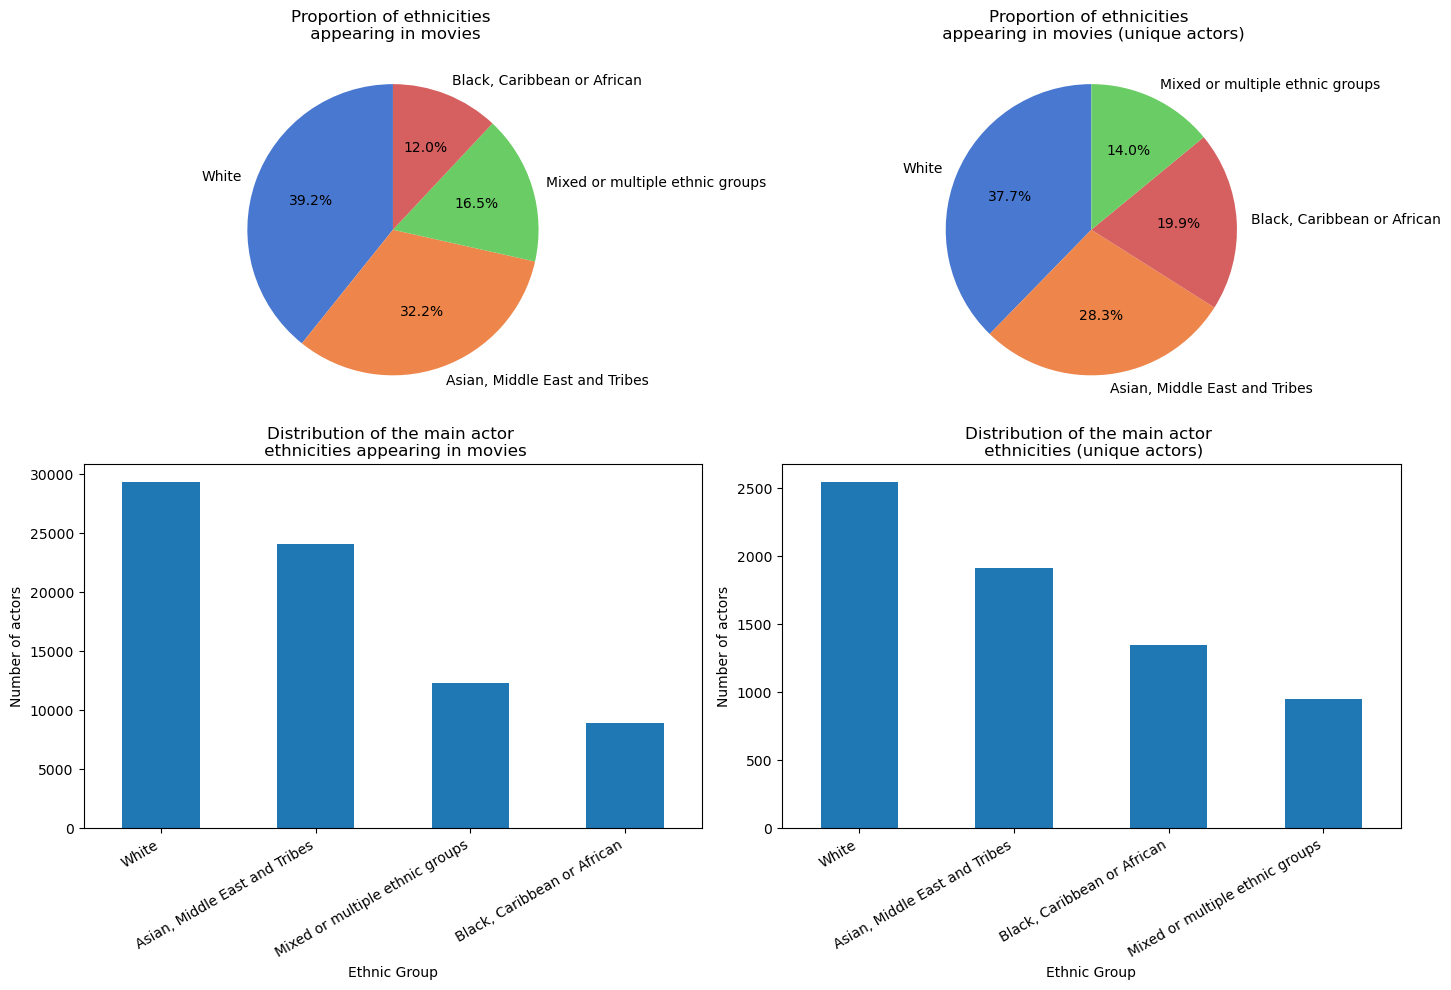

In [106]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


# Non unique
grouped_ethnicity = characters_movies.copy().groupby(['Ethnic Group']).count()
main_ethnicities = grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)

# Unique
unique_characters_movies = characters_movies.copy().drop_duplicates(subset='Freebase actor ID')
grouped_ethnicity_unique = unique_characters_movies.groupby(['Ethnic Group']).count()
main_ethnicities_unique = grouped_ethnicity_unique['Freebase actor ID'].sort_values(ascending=False)

cmap = sns.color_palette('muted' , len(main_ethnicities.index))
color_dict = dict(zip(main_ethnicities.index, cmap))

main_ethnicities.plot(kind='bar', ax=axs[1,0])
axs[1,0].set_title("Distribution of the main actor \n ethnicities appearing in movies")
axs[1,0].set_ylabel("Number of actors")
axs[1,0].set_xticklabels(main_ethnicities.index, rotation=30, ha='right')

main_ethnicities_unique.plot(kind='bar', ax=axs[1,1])
axs[1,1].set_title("Distribution of the main actor \n ethnicities (unique actors)")
axs[1,1].set_ylabel("Number of actors")
axs[1,1].set_xticklabels(main_ethnicities_unique.index, rotation=30, ha='right')



main_ethnicities.plot.pie( autopct='%1.1f%%', startangle=90, title='Proportion of ethnicities \n appearing in movies', label='', ax = axs[0,0], colors=[color_dict[i] for i in main_ethnicities.index])

main_ethnicities_unique.plot.pie(autopct='%1.1f%%', startangle=90, title='Proportion of ethnicities \n appearing in movies (unique actors)', label='', ax = axs[0,1], colors=[color_dict[i] for i in main_ethnicities_unique.index])

plt.tight_layout()
plt.show()


We can see that Black, Caribbean or African actors do not tend to appear multiple times in different movies as it happens with the other ethinicities.

#### Time-analysis time! 
Let's see how the participation of the different ethnic groups evolved over time. 

Text(0, 0.5, 'Proportion of actors')

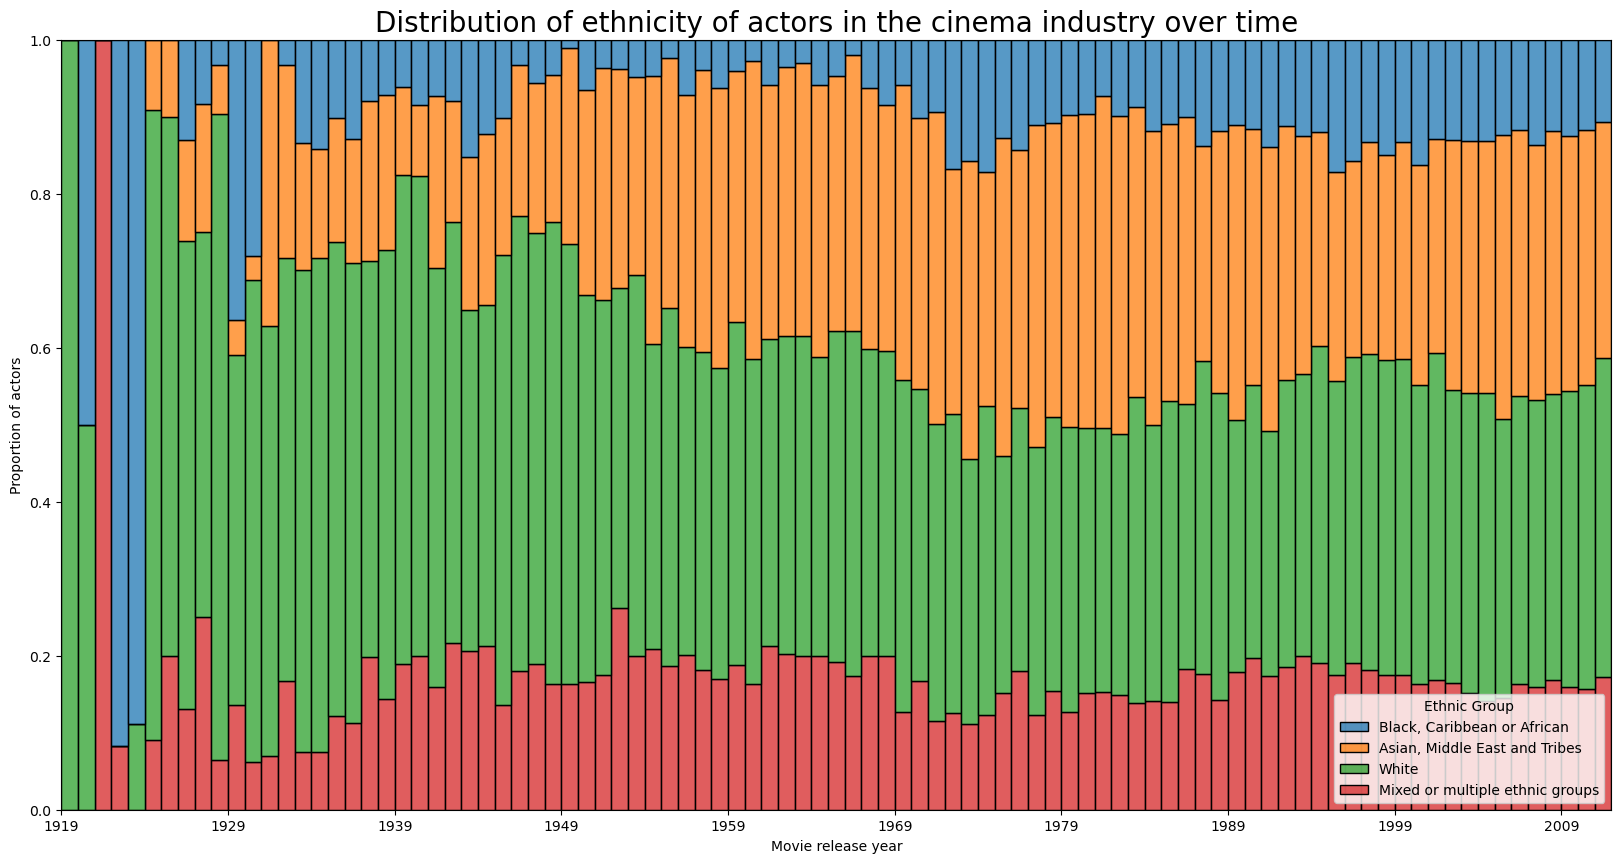

In [107]:
plt.figure(figsize=(20,10))
sns.histplot(data=characters_movies,x='Movie release year',hue='Ethnic Group',multiple='fill',stat='probability', binwidth=1)
plt.title("Distribution of ethnicity of actors in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')

To better visualize let's "Smooth" the plot:

Text(0, 0.5, 'Proportion of actors')

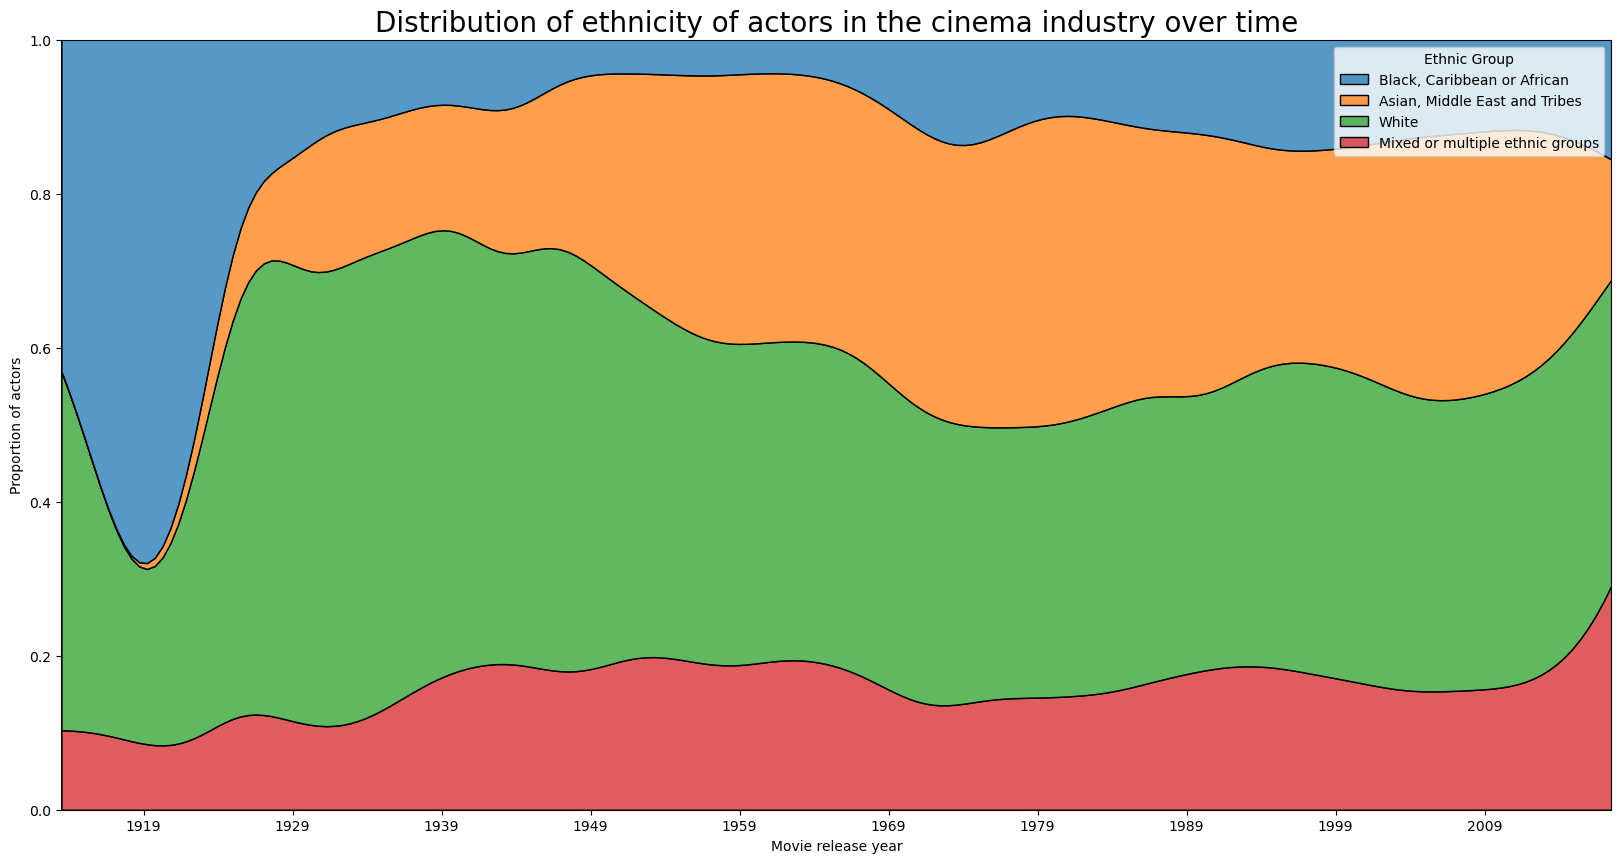

In [108]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=characters_movies,x='Movie release year',hue='Ethnic Group',multiple='fill')
plt.title("Distribution of ethnicity of actors in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')

Heat maps can also be useful to visualize this information by also taking into account the real number of actors that played in movies instead of just proportions. The histogram below shows the evolution of the number of actors over the years.

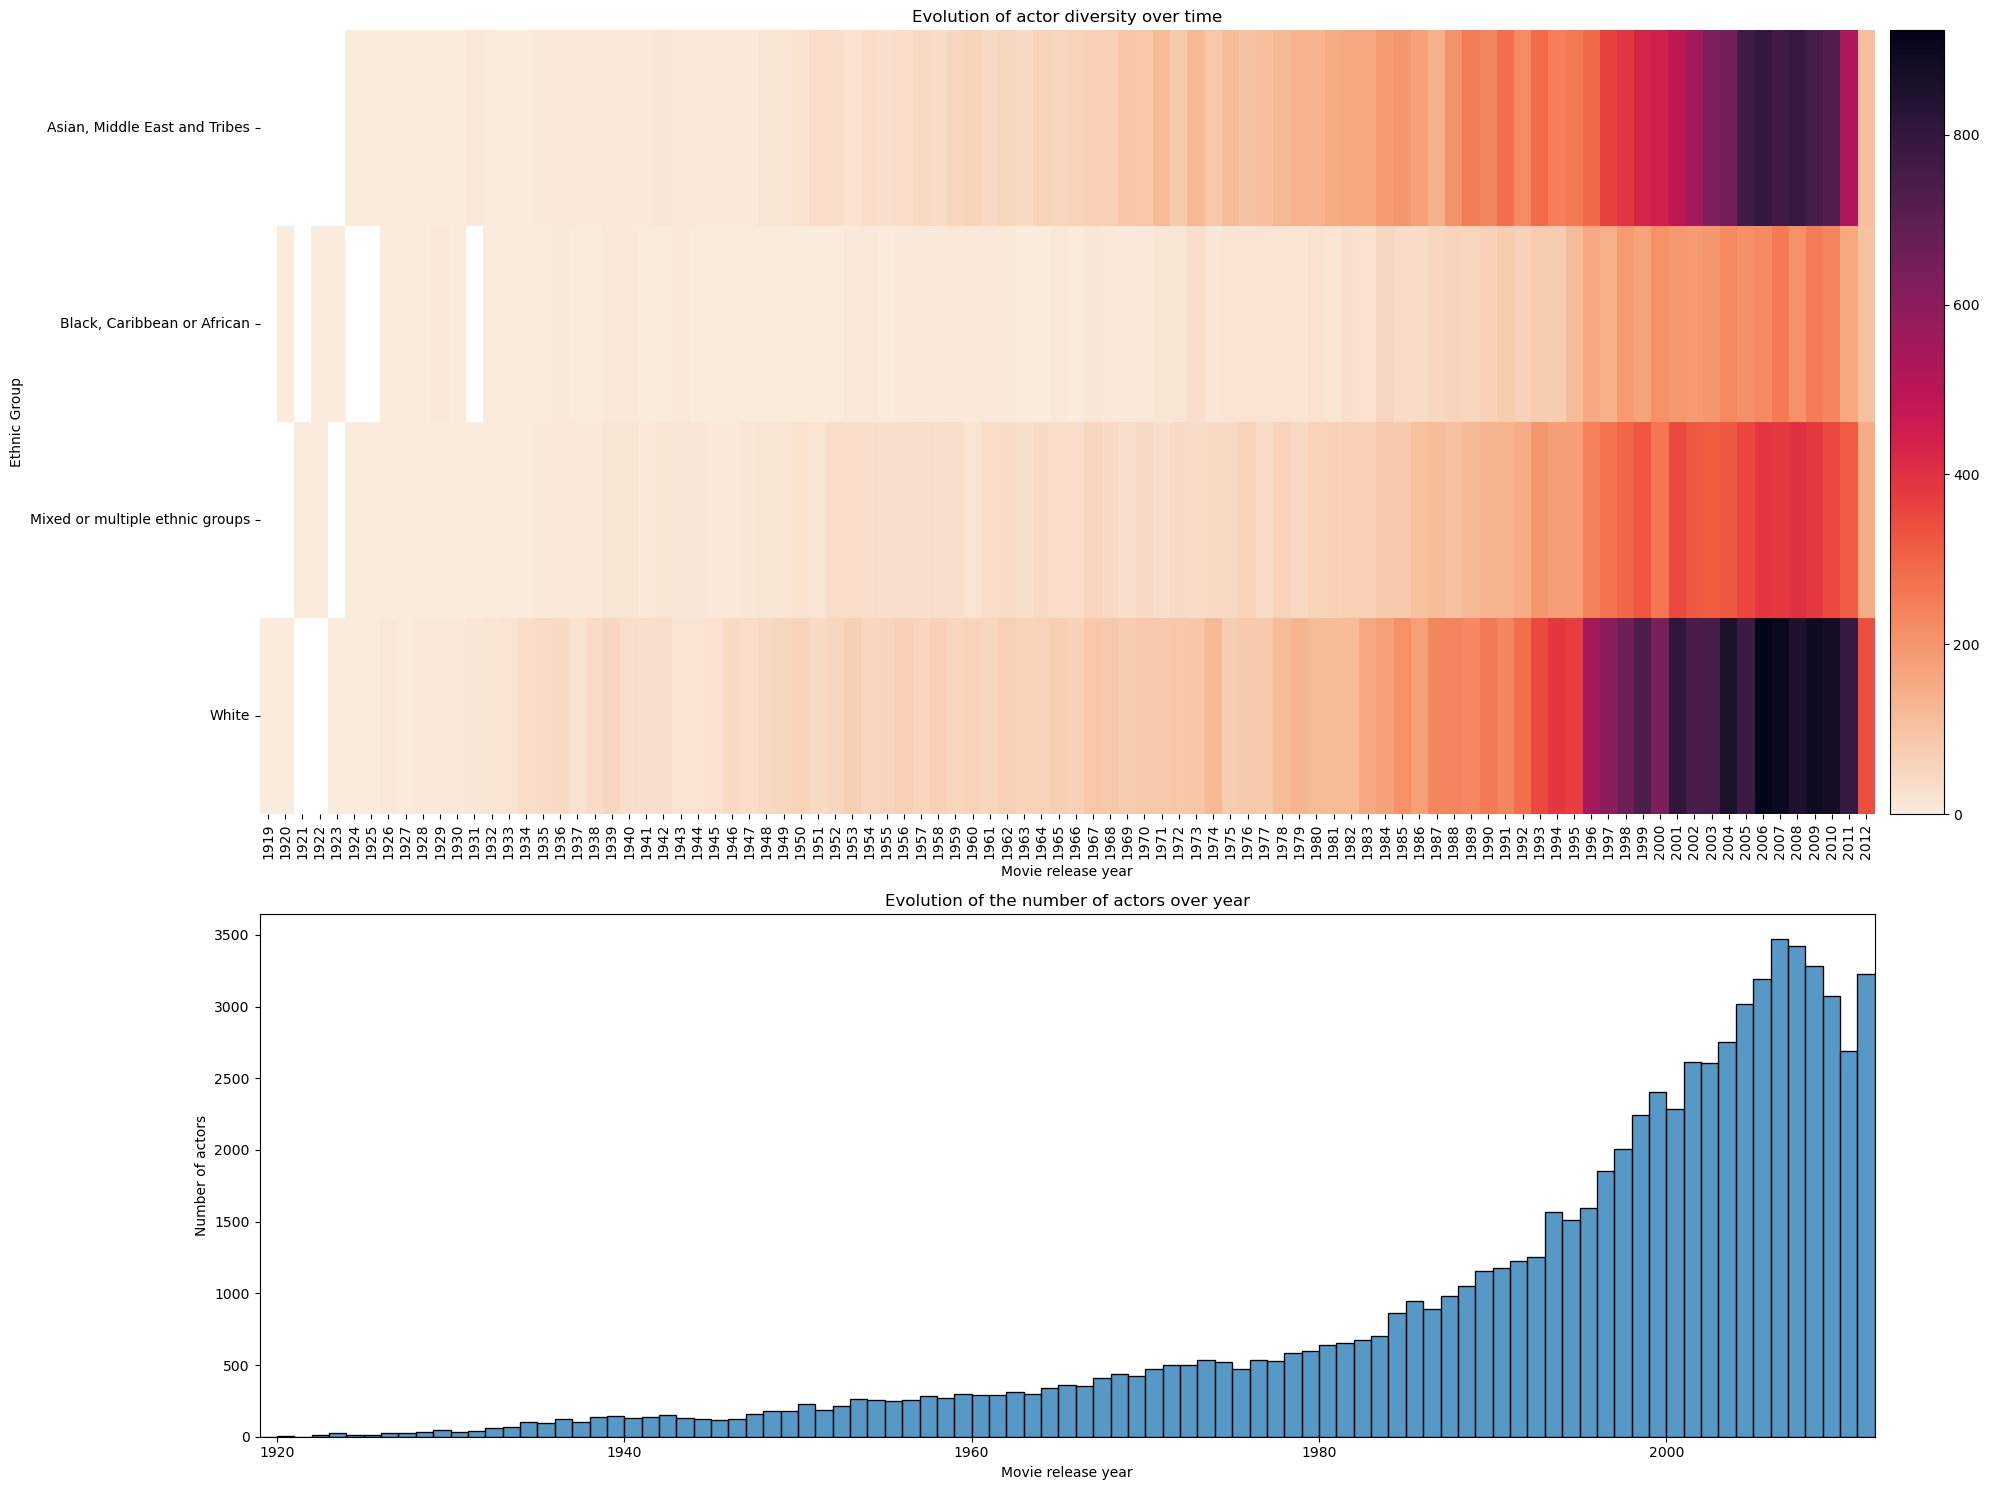

In [109]:
map_year_actor = characters_movies.pivot_table(index=['Movie release year'], columns='Ethnic Group', values='Freebase character ID', aggfunc='count')
df_year_actor = pd.DataFrame(map_year_actor.values,columns=map_year_actor.columns.values.tolist(),index=map_year_actor.index.values.tolist())


fig, axs = plt.subplots(2,2, figsize=(20, 15), gridspec_kw={'height_ratios': [1.5, 1], 'width_ratios': [30, 1]})

# Create the heatmap without a color bar
cax = sns.heatmap(map_year_actor.transpose(),cmap="rocket_r", ax= axs[0, 0], cbar=False)
axs[0, 0].set_title("Evolution of actor diversity over time")
axs[0, 0].set_xlabel("Movie release year")

# Create a color bar in axs[1,1]
cb = Colorbar(ax=axs[0,1], mappable=cax.get_children()[0])

sns.histplot(data= characters_movies ,x='Movie release year',stat='count', binwidth=1, ax = axs[1, 0])
axs[1, 0].set_title('Evolution of the number of actors over year')
axs[1, 0].set_ylabel('Number of actors')
axs[1, 0].set_xlabel("Movie release year")
axs[1, 0].set_xlim([1919, 2012])

# Hide the unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

We can see that the number of actors increased over the years. We also see that the Asian, Middle East and Tribes, and the White Ethnic groups were the ones that increased the most.

#### Analysis based on gender 
Here the genders of the different Ethnic groups will be analyzed to see disproportions between male and female actors.  

In [110]:
H_ethinity_M = unique_characters_movies[unique_characters_movies['Gender'] == 'M'].groupby(['Ethnic Group'])['Freebase actor ID'].count().sort_values()
H_ethinity_M_reversed = H_ethinity_M*(-1)
H_ethinity_F = unique_characters_movies[unique_characters_movies['Gender'] == 'F'].groupby(['Ethnic Group'])['Freebase actor ID'].count().sort_values()

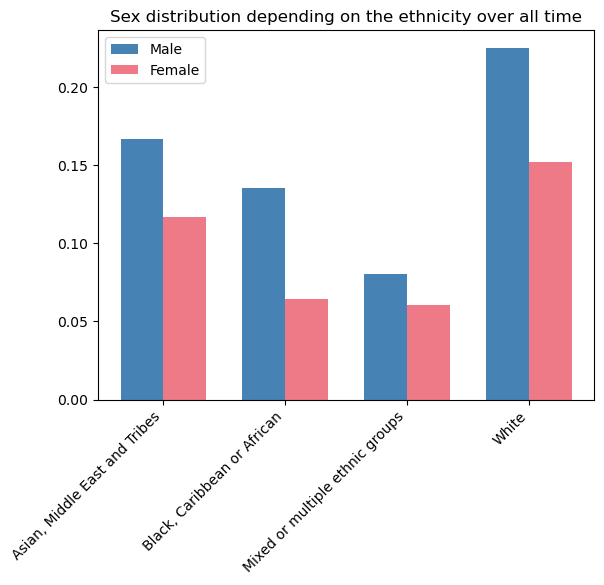

In [111]:
proportion_ethinity_M = unique_characters_movies[unique_characters_movies['Gender'] == 'M'].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(unique_characters_movies['Gender'])))
proportion_ethinity_F = unique_characters_movies[unique_characters_movies['Gender'] == 'F'].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(unique_characters_movies['Gender'])))


bar_width = 0.35
bar_l = np.arange(len(proportion_ethinity_M))
tick_pos = [i + bar_width / 2 for i in bar_l]
plt.bar(bar_l, proportion_ethinity_M.values, width=bar_width, color="#4682b4", label="Male")
plt.bar(bar_l + bar_width, proportion_ethinity_F.values, width=bar_width, color="#ee7a87", label="Female")
plt.xticks(tick_pos, proportion_ethinity_M.index, rotation=45, ha='right')

plt.legend()
plt.title("Sex distribution depending on the ethnicity over all time")

plt.show()

For all ethnic groups we see that there is a majority of men over women. Now let's see the distribution of men and women over the years for different ethnic groups. To do so, same actors can appear in two or more different years.

In [112]:
# Let's groupby Ethincity and Year and separate the genders.
H_ethinity_M_year = characters_movies[characters_movies['Gender'] == 'M'].groupby(['Ethnic Group', 'Movie release year'])['Freebase actor ID'].count().sort_values()

H_ethinity_F_year = characters_movies[characters_movies['Gender'] == 'F'].groupby(['Ethnic Group', 'Movie release year'])['Freebase actor ID'].count().sort_values()

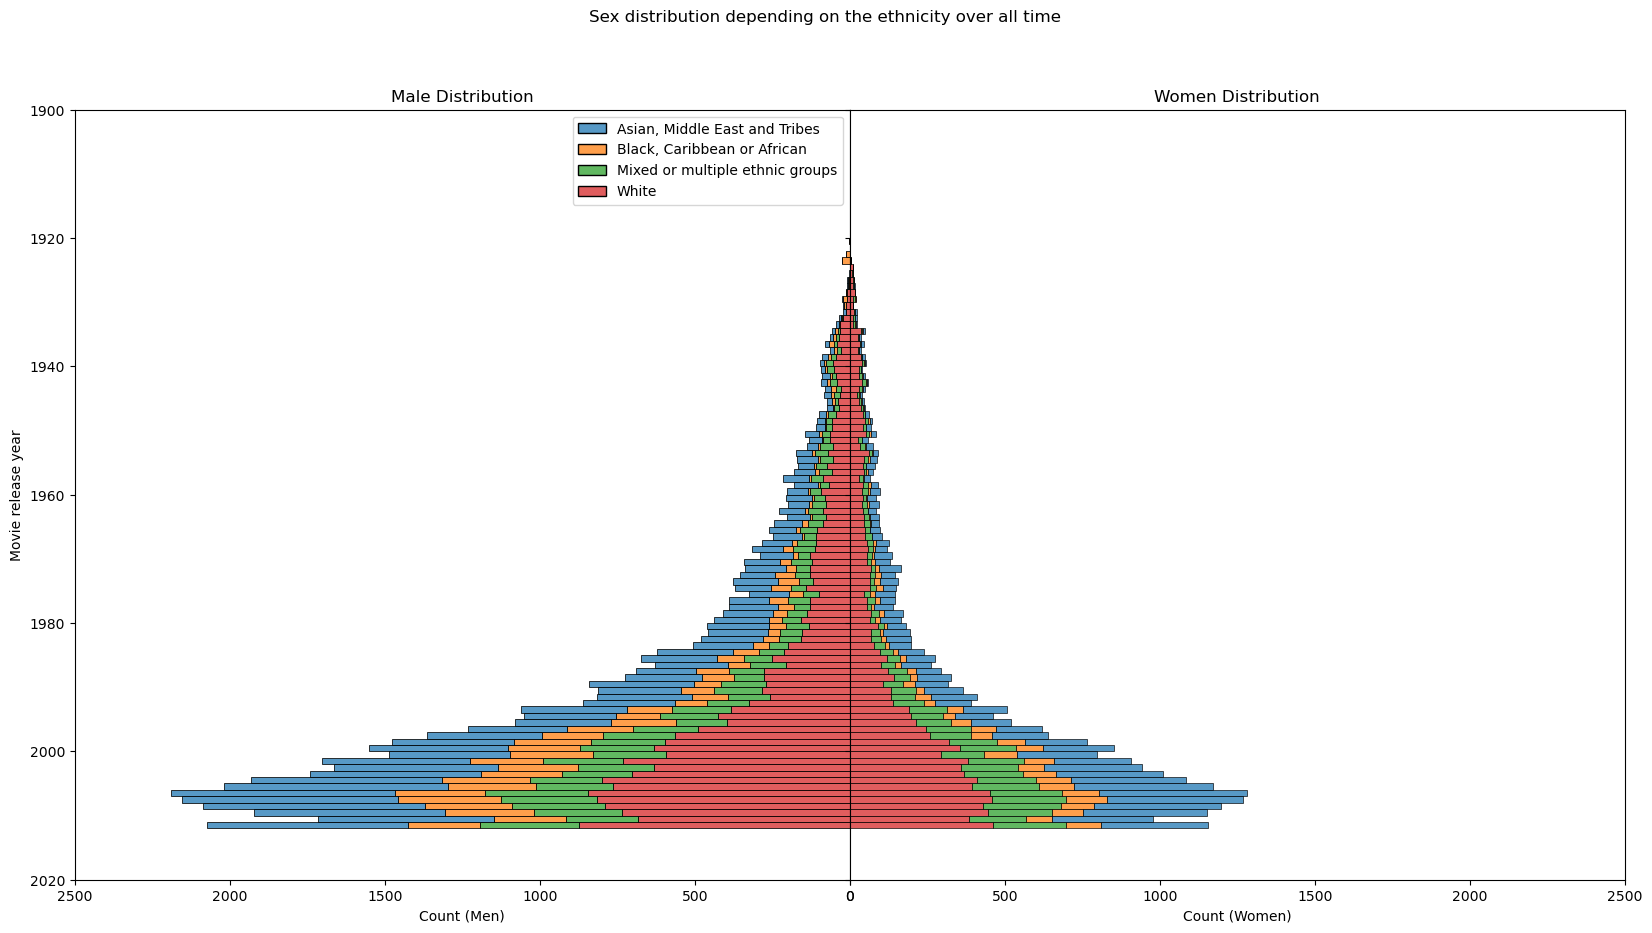

In [113]:
ethnicities_M, years_M = zip(*H_ethinity_M_year.index)
ethnicities_F, years_F = zip(*H_ethinity_F_year.index)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0)

# Plot for men
sns.histplot(ax=ax[0], y=list(years_M), weights=np.abs(H_ethinity_M_year.values), hue=list(ethnicities_M), multiple='stack', stat='count', binwidth=1)

ax[0].set_xlabel("Count (Men)")
ax[0].invert_xaxis()# Flip the x-axis
ax[0].set_ylabel("Movie release year")
ax[0].set_ylim(2020, 1900)  # Flip the y-axis
ax[0].set_xlim(2500, 0)
ax[0].set_title('Male Distribution')

# Plot for women
sns.histplot(ax=ax[1], y=list(years_F), weights=np.abs(H_ethinity_F_year.values), hue=list(ethnicities_F), multiple='stack', stat='count', binwidth=1, legend= False)
  
ax[1].set_xlabel("Count (Women)")
ax[1].set_ylim(2020, 1900)  # Flip the y-axis
ax[1].set_xlim(0, 2500)
ax[1].set_title('Women Distribution')

plt.suptitle("Sex distribution depending on the ethnicity over all time")
plt.show()

We still see that there are almost no years where ethinc groups had more women than men. The most balanced ethnic group is the Mixed one. 

Now let's analyze the age distribution of the actors, and compare them between male and female.


Text(0.5, 0.98, '')

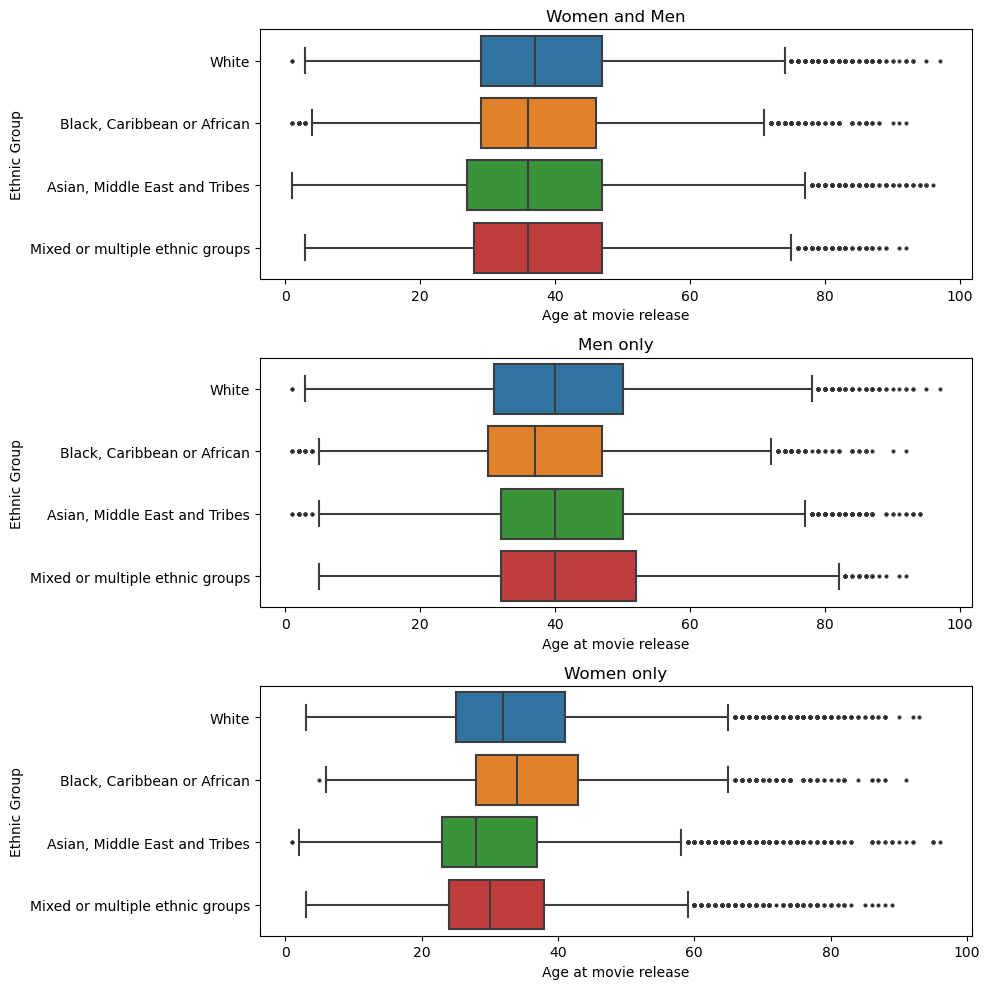

In [114]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
flierprops = dict(marker='o', markerfacecolor='black', markersize=2)

sns.boxplot(data=characters_movies, x="Age at movie release", y="Ethnic Group", 
            ax=ax[0], flierprops=flierprops,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[0].set_title('Women and Men')
ax[0].set_xlabel('Age at movie release')

sns.boxplot(data=characters_movies[characters_movies['Gender'] == 'M'], 
            x="Age at movie release", y="Ethnic Group", ax=ax[1], flierprops=flierprops,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[1].set_title('Men only')
ax[1].set_xlabel('Age at movie release')

sns.boxplot(data=characters_movies[characters_movies['Gender'] == 'F'], 
            x="Age at movie release", y="Ethnic Group", ax=ax[2], flierprops=flierprops,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[2].set_title('Women only')
ax[2].set_xlabel('Age at movie release')
fig.tight_layout()

plt.suptitle('', fontsize=20)

We see that women tend to be much younger than men for all ethnic groups. The smallest difference is in the Black, Caribbean or African ethnic group, where the men are only slightly older than the women.

#### Movie revenue depending on the ethinicity proportion
In this section, we will analyze the revenue of a movie based on the proportion of the ethnic groups.

In [124]:
movie_revenues=characters_movies.copy().groupby('Movie name').apply(lambda x: pd.DataFrame({
        'Number of ethnicities': x['Ethnic Group'].nunique(),
        'Revenue': x['Box office revenue'].drop_duplicates(),
        'Rating': x['Vote average'].drop_duplicates()
    }))
movie_revenues=movie_revenues.dropna()

<function matplotlib.pyplot.xlim(*args, **kwargs)>

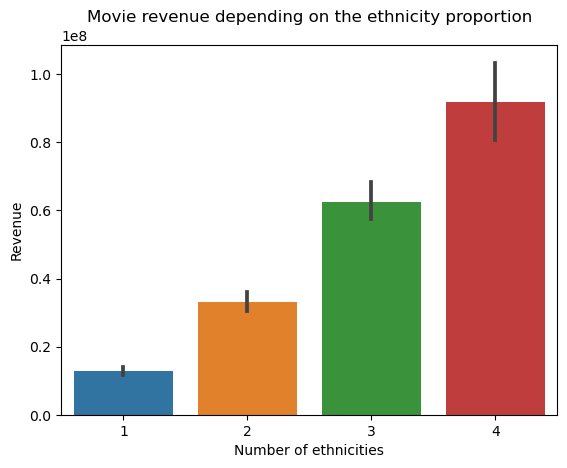

In [116]:
sns.barplot(data=movie_revenues, x='Number of ethnicities', y='Revenue')
plt.title('Movie revenue depending on the ethnicity proportion')
plt.xlim

This plot shows that as there are more ethincities in a movie, the revenue of the movie tend to increase. However, keep in mind that the uncertainty also increases.  

In [117]:
stats.pearsonr(movie_revenues['Number of ethnicities'],movie_revenues['Revenue'])

PearsonRResult(statistic=0.2629095262132827, pvalue=4.345136499519499e-149)

The above observation is confirmed by a Pearson correlation test, indeed the two variables are correlated, the differences are statistically significant. We still keep in mind that correlation doesn't imply causation.

In [118]:
from scipy.stats import ttest_ind
from itertools import combinations

for (x,y) in list(combinations(range(1,5),2)):
    p_value=ttest_ind(movie_revenues[movie_revenues['Number of ethnicities']==x]['Revenue'],
                    movie_revenues[movie_revenues['Number of ethnicities']==y]['Revenue'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," ethnicities and ", y, " ethnicities in a movie: ",  p_value)


ttest p-value result between  1  ethnicities and  2  ethnicities in a movie:  1.1072285180494122e-36
ttest p-value result between  1  ethnicities and  3  ethnicities in a movie:  5.004295895455157e-63
ttest p-value result between  1  ethnicities and  4  ethnicities in a movie:  1.7162872725296286e-37
ttest p-value result between  2  ethnicities and  3  ethnicities in a movie:  1.3315207594370355e-20
ttest p-value result between  2  ethnicities and  4  ethnicities in a movie:  1.2740383093188743e-21
ttest p-value result between  3  ethnicities and  4  ethnicities in a movie:  5.8003612876351284e-06


We see that the averages of revenues of the various number of ethnicities are statistically different. So, we could search for a causation based on these parameters.

Next, we can check if the different ethnic groups tend to play in movies with different box office revenues.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Black, Caribbean or African'),
  Text(1, 0, 'Asian, Middle East and Tribes'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Mixed or multiple ethnic groups')])

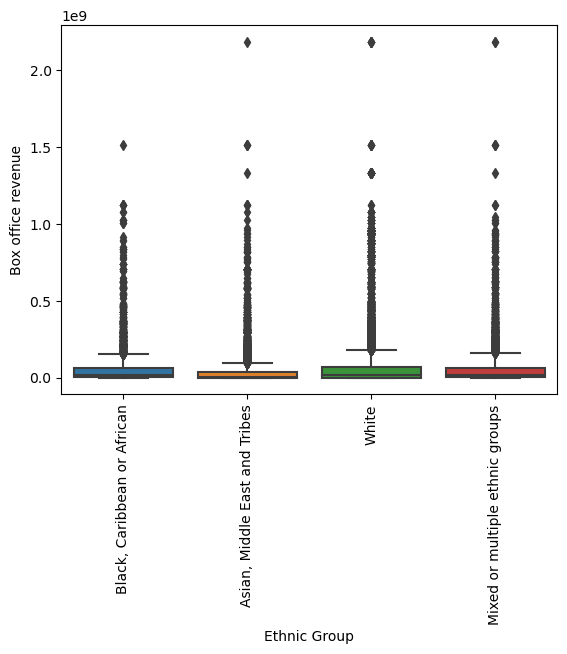

In [119]:
sns.boxplot(data=characters_movies, y="Box office revenue", x="Ethnic Group")
plt.xticks(rotation=90)

In [120]:
ethnic_groups=characters_movies['Ethnic Group'].unique()
for (x,y) in list(combinations(ethnic_groups,2)):
    p_value=ttest_ind(characters_movies[characters_movies['Ethnic Group']==x]['Box office revenue'],
                      characters_movies[characters_movies['Ethnic Group']==y]['Box office revenue'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," and ", y, ": ",  p_value)



ttest p-value result between  Black, Caribbean or African  and  Asian, Middle East and Tribes :  2.986463829573591e-11
ttest p-value result between  Black, Caribbean or African  and  White :  2.5764827902626774e-16
ttest p-value result between  Black, Caribbean or African  and  Mixed or multiple ethnic groups :  0.18937300840028048
ttest p-value result between  Asian, Middle East and Tribes  and  White :  1.623917930637003e-56
ttest p-value result between  Asian, Middle East and Tribes  and  Mixed or multiple ethnic groups :  4.223739978235911e-16
ttest p-value result between  White  and  Mixed or multiple ethnic groups :  4.626619261210452e-12


We observe that Black, Caribbean or Afcrican actors and actors of mixed background play in movies with similar average box office revenues. The other groups have a statistical difference. We can also see on the graph that white actors tend to play in the movies with highest box office revenues, while the Asian, Middle East and Tribes group appears in those with the lowest revenue.

#### Role Analysis
For this part, we will be looking at the importance that each ethnic group has in a movie. 

We will start by seeing the proportion of actors that were unnamed, which means that they were probably not playing a major role in the movie.

Text(0, 0.5, 'Percentage of unnamed actors')

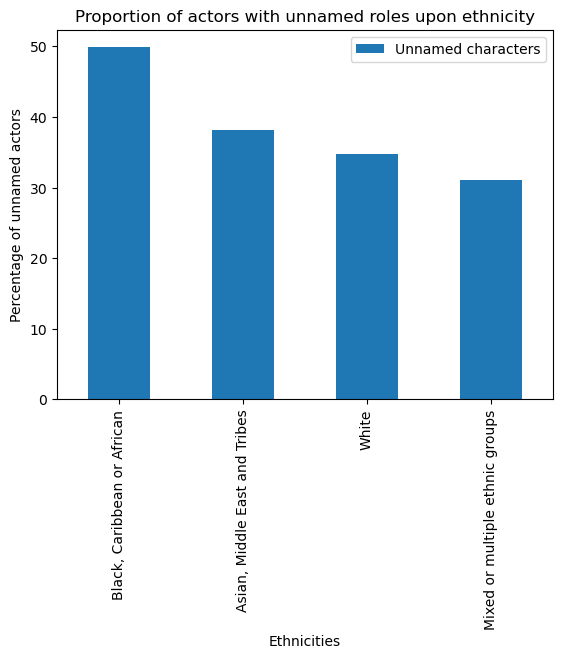

In [121]:
proportion_unnamed_actors = characters_movies.copy().groupby('Ethnic Group').apply(lambda x: pd.Series({
        'Unnamed characters': x['Character name'].isna().sum()*100/len(x['Character name'])
    })).sort_values(ascending=False,by = 'Unnamed characters')
proportion_unnamed_actors.plot(kind='bar')
plt.title("Proportion of actors with unnamed roles upon ethnicity")
plt.xlabel('Ethnicities')
plt.ylabel('Percentage of unnamed actors')

We see that Black, Caribbean or African are the ones with the highest amount of missing values while the other ethnicities have similar amount of missing actor names. Let's see if this is the case over time:

Text(0, 0.5, 'Proportion of actors')

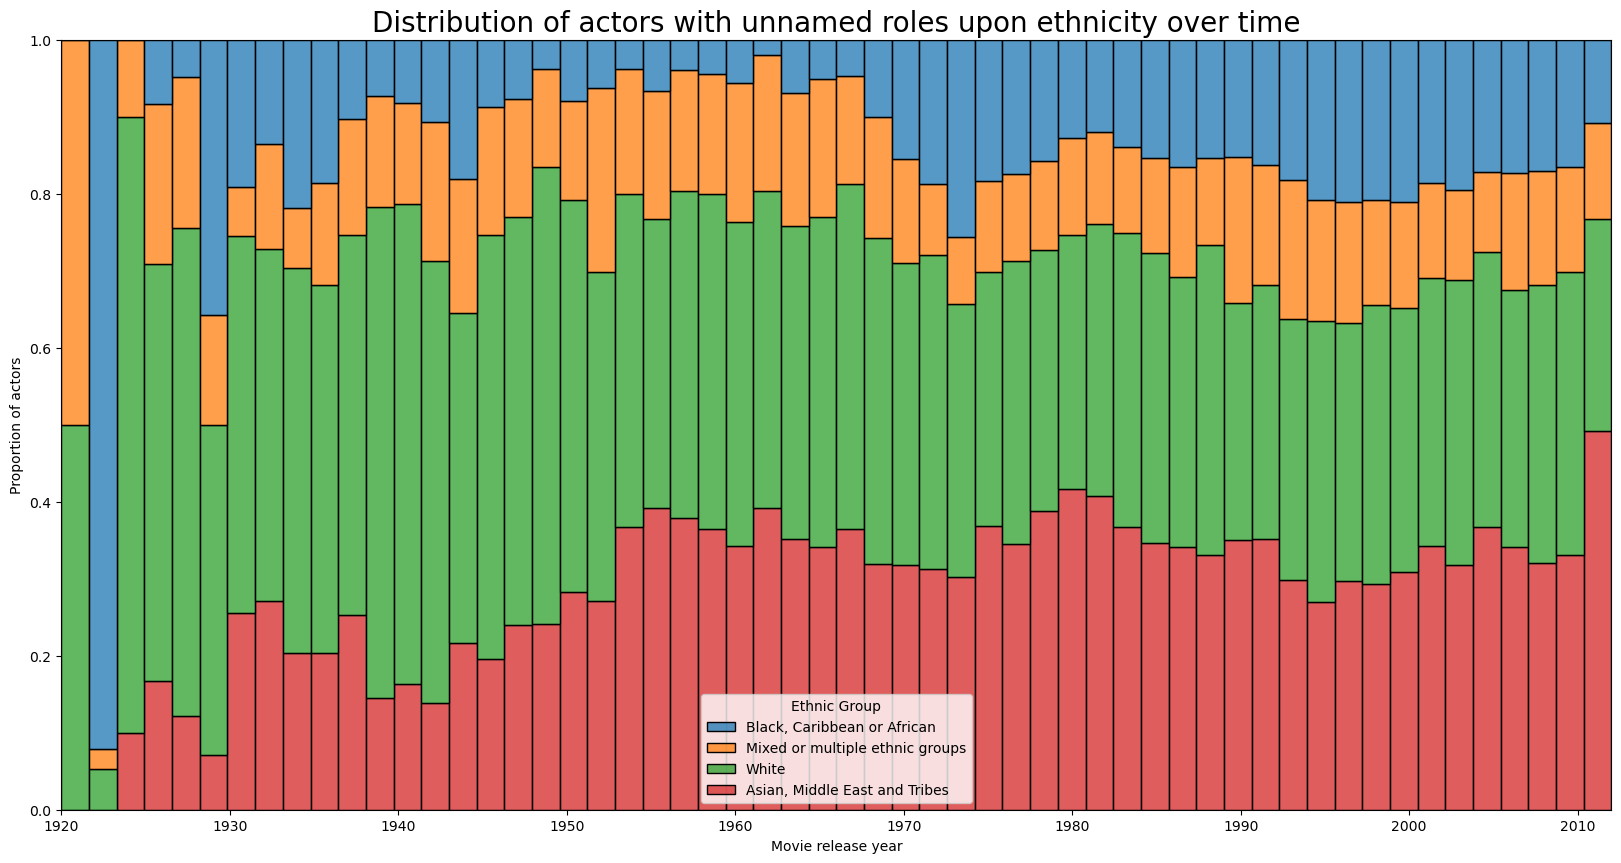

In [122]:
unnamed_actors = characters_movies[characters_movies['Character name'].isna()]
plt.figure(figsize=(20,10))
sns.histplot(data=unnamed_actors,x='Movie release year',hue='Ethnic Group',multiple='fill')
plt.title("Distribution of actors with unnamed roles upon ethnicity over time",fontsize=20)
plt.xticks(np.arange(unnamed_actors['Movie release year'].min(),unnamed_actors['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')


Here we see that despite Black, Caribbean or African, were the ones with higher percentage, since there are not that many actors in comparison to the other ethinc groups, their yearly percentage is lower. Asian, Middle East and Tribes, and White, are the ones with more missing names for each year in proportion to the other groups. 

Text(0.5, 1.0, 'Movie rating depending on the ethnicity proportion')

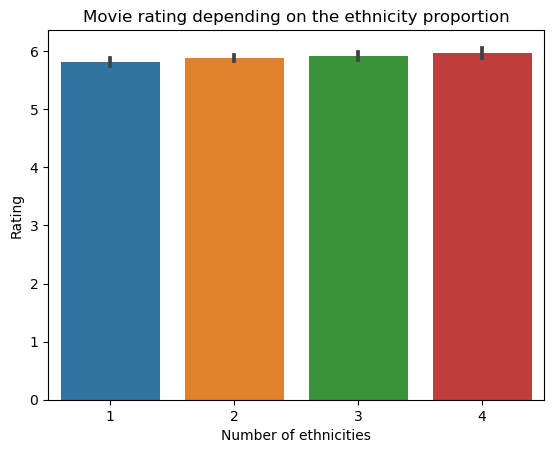

In [125]:
sns.barplot(data=movie_revenues, x='Number of ethnicities', y='Rating')
plt.title('Movie rating depending on the ethnicity proportion')

We see that contrary to the revenue, the ratings are much more similar. Nonetheless, we perform a pearson correlation test, to see if there is a relationship between the two, keeping always in mind de difference between causation and correlation.

In [126]:
stats.pearsonr(movie_revenues['Number of ethnicities'],movie_revenues['Revenue'])

PearsonRResult(statistic=0.2567739075668313, pvalue=5.758925756637542e-87)

As the p-value of this this test is much smaller than 0.05, we can conclude that despite the small differences, there is a positive statistically significant correlation between the number of ethnicities and the rating of a movie.

In [127]:
for (x,y) in list(combinations(range(1,5),2)):
    p_value=ttest_ind(movie_revenues[movie_revenues['Number of ethnicities']==x]['Rating'],
                    movie_revenues[movie_revenues['Number of ethnicities']==y]['Rating'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," ethnicities and ", y, " ethnicities in a movie: ",  p_value)

ttest p-value result between  1  ethnicities and  2  ethnicities in a movie:  0.1245677362630824
ttest p-value result between  1  ethnicities and  3  ethnicities in a movie:  0.018879848129102754
ttest p-value result between  1  ethnicities and  4  ethnicities in a movie:  0.006064325966763932
ttest p-value result between  2  ethnicities and  3  ethnicities in a movie:  0.3586071887725316
ttest p-value result between  2  ethnicities and  4  ethnicities in a movie:  0.10460230008012285
ttest p-value result between  3  ethnicities and  4  ethnicities in a movie:  0.3823296637231033


After the t-test we notice that there are only 2 statistically significant differences in the average of the ratings. This is the case between 1 and 3 as well as 1 and 4 ethnicities present in the movie.

<Axes: xlabel='Vote average', ylabel='Ethnic Group'>

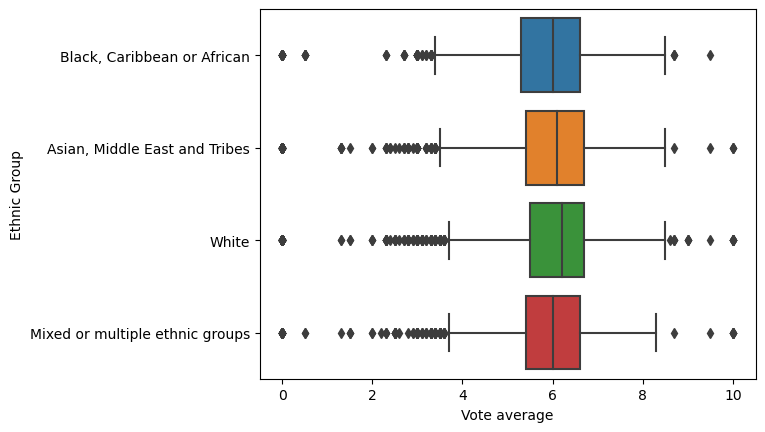

In [132]:
sns.boxplot(data=characters_movies, x="Vote average", y="Ethnic Group")


In [133]:
for (x,y) in list(combinations(ethnic_groups,2)):
    p_value=ttest_ind(characters_movies[characters_movies['Ethnic Group']==x]['Vote average'],
                      characters_movies[characters_movies['Ethnic Group']==y]['Vote average'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," and ", y, ": ",  p_value)

ttest p-value result between  Black, Caribbean or African  and  Asian, Middle East and Tribes :  0.06180290126696563
ttest p-value result between  Black, Caribbean or African  and  White :  3.254015246311308e-17
ttest p-value result between  Black, Caribbean or African  and  Mixed or multiple ethnic groups :  0.14202593359960453
ttest p-value result between  Asian, Middle East and Tribes  and  White :  3.184436401103799e-11
ttest p-value result between  Asian, Middle East and Tribes  and  Mixed or multiple ethnic groups :  0.6496939311859634
ttest p-value result between  White  and  Mixed or multiple ethnic groups :  1.6326312993161438e-13
